# Intro
This is going to be a fast whirlwind into python. With 1 hour I won't be able to teach you everything about python, so instead I'll just give you the broad details, some examples, and some links to more references.

# The basics

## Mathematical operators

In [1]:
a = 4
b = a * 3.4
b += 1  # same as b = b + 1
print(b)

14.6


**Note**: exponentiation is done by `**` NOT `^`

In [2]:
2**3

8

In [3]:
2^3 # this is actually (2 BITWISE_OR 3), not 2*2*2

1

## Logic and Control Flow

`if` blocks and other types of logic use whitespace to demark the block of code it affects

In [4]:
if b > 3:
    print("b is greater than 3")

b is greater than 3


Functions also use whitespace, and need to start with `def`:

In [5]:
def multiply_by_5(x):
    return x*5

multiply_by_5(2)

10

## Importing external code
This approach works for both code you write and packages you install with `conda`/`pip`.

First I'll just make a sample file.

In [6]:
with open("sample_file.py", mode="w") as f:
    f.write("""
def divide_by_two(x):
    result = x / 2
    return result
    
def divide_by_three(x):
    result = x / 3
    return result

    """)


In [7]:
import sample_file

sample_file.divide_by_two(4)

2.0

In [8]:
from sample_file import divide_by_three # you can import 

divide_by_three(12)

4.0

**Note**: it's hard to import an arbitrary script stored in a random folder on your computer. The simplest solution is to make sure it's in the same folder as where you started python from, or the folder where your jupyter notebook is located.

To import packages you installed from pip/conda, you do the same thing, but don't need to worry about where it's saved:

In [9]:
import datetime
datetime.datetime.today()

datetime.datetime(2019, 1, 22, 13, 14, 7, 989667)

## Collections of objects
So I've already shown that python can handle `int`s, `float`s, and `string`s. The next level up is *collections* of these objects.

In general, python is fine having a collection of multiple types all at once:

In [10]:
my_list = [1, 2, 3, 4]
my_other_list = [1, "two", 3.14]

print("my_list type: ", type(my_list))
print("my_other_list type: ", type(my_other_list))

my_list type:  <class 'list'>
my_other_list type:  <class 'list'>


You can change the elements within a list, as well as changing the size of a list

In [11]:
my_changing_list = [1, 2, 3, 4]
print(my_changing_list)


[1, 2, 3, 4]


In [12]:
my_changing_list[3] = "hello world"  # note that it's 0-indexed!
print(my_changing_list)




[1, 2, 3, 'hello world']


In [13]:
my_changing_list.append("test")
print(my_changing_list)



[1, 2, 3, 'hello world', 'test']


In [14]:
my_changing_list += ["appending", "a", "second", "list", "example"]
print(my_changing_list)



[1, 2, 3, 'hello world', 'test', 'appending', 'a', 'second', 'list', 'example']


In [15]:
last_element = my_changing_list.pop()
print(my_changing_list)
print("last_element: ", last_element)

[1, 2, 3, 'hello world', 'test', 'appending', 'a', 'second', 'list']
last_element:  example


**Note**: You technically can run the above cells in any order, but you'll keep getting different results. This is an example of how jupyter notebooks can make it easier to screw up your code/results.  In general your notebook should only run from top to bottom, and you should put anything super important into a separate `.py` file.

### Creating `list`s: constructor vs literal

You can also create a `list` using its "constructor", rather than the "literal" version above. 

The constructor (`list()`) version is most useful when you're converting something else into a list. The "literal" version (`[...]`) is best if your coding it in manually.

In [16]:
list_from_constructor = list()
print(list_from_constructor)

[]


In [17]:
list_from_constructor.append("a")
print(list_from_constructor)

['a']


## `for` loops and iterating over collections
You can use a `for` loop with either the list index or the list values:

In [18]:
sample_list = [10, 20, 30, 40]

In [19]:
for i in range(len(sample_list)): # iterates from 0 to 3
    print(sample_list[i])

10
20
30
40


In [20]:
for value_from_list in sample_list:
    print(value_from_list)

10
20
30
40


## `tuple`
- `tuple` is like a list, except you can't change it once you create it. It has a literal version `(1, 2, ...)` and a constructor `tuple()`

In [21]:
my_tuple = (1, 2, 3)
my_tuple[2] = "new value"

TypeError: 'tuple' object does not support item assignment

Tuple also has a constructor and literal version

In [22]:
tuple_1 = (1, 2, 3)
tuple_2 = tuple([4, 5, 6]) # creates a list, and then converts that into a tuple

## Dict
Unlike lists which require integer indices (`my_list[0]`), dictionaries use user-defined indices.

(This makes this a "key -> value" map, if that helps you understand)

In [23]:
my_dict = {"NGC_1234": 5.2,
           "NGC_5678": 3.4,
           "SN_1987a": "the value matched to SN_1987a",
          }

print(my_dict["NGC_1234"])

5.2


Also `dict` has a literal version:

In [24]:
redshift_dict = {"NGC_1234": 5.2}

and a constructor version

In [25]:
redshift_dict = dict()
redshift_dict["NGC_1234"] = 5.2

print(redshift_dict["NGC_1234"])

5.2


**Note**: `dict`s can use a `tuple` as an index/label, but not `list`, so make sure to convert them. Example (bad, then good):

In [26]:
temporary_list = ["3", "quick", "things"]
my_dict[ temporary_list ] = 1.0

TypeError: unhashable type: 'list'

In [27]:
my_dict[ tuple(temporary_list) ] = 1.0

print(my_dict[tuple(temporary_list)])

1.0


Using tuples as the key is useful for when you want the key to be a combination of multiple variables (e.g. RA and DEC pairs, not just RA or DEC individually.)

`dict`s can have any data type as their "value", just like `list`s and `tuples`

### Misc. collections
I won't talk about things like `set`s, `Counters`, etc. Just know there's an entire `collections` library.


# `numpy` and `array`s
`lists` and the built-in functions are great, but we often want to do *numerical* science. For this, basically everything will built upon the package `numpy` (numerical python)

In [28]:
import numpy as np # standard abbreviation

In [29]:
np.exp(2) # e^2

7.38905609893065

In [30]:
np.pi

3.141592653589793

`numpy` also provides `array`s, which let you create list-like objects, which behave like _vectors_:

In [31]:
example_list = [1, 2, 3]
example_array = np.array(example_list)
example_array

array([1, 2, 3])

In [32]:
10 * example_array

array([10, 20, 30])

In [33]:
np.log10(example_array)

array([0.        , 0.30103   , 0.47712125])

In [34]:
np.dot(np.array([1,2,3]), np.array([4,5,6]))

32

In [35]:
my_matrix = np.array([[1,2,3],
                      [4,5,6],
                      [7,8,9]])

np.dot(my_matrix, np.array([-2, 0, 1]))

array([ 1, -2, -5])

In general, `array`s will be the standard way we group together large numbers of values (even if we don't need it to behave like a matrix). Even more complicated data types (like `fits` images) will still be based on `numpy.array`.

# Plotting with `matplotlib`

The core plotting package for python is `matplotlib`, and more specifically `matplotlib.pyplot`

Here's their [example gallery](https://matplotlib.org/gallery/index.html) which is a great place for finding how to do more complex types of plots.

In [36]:
from matplotlib import pyplot as plt

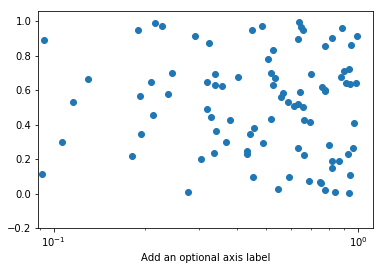

In [37]:
xs = np.random.random(100) # draw 100 random values in (0, 1), store as an array
ys = np.random.random(xs.size)

plt.scatter(xs, ys)
plt.xlabel("Add an optional axis label")

plt.ylim(bottom=-.2) # you can change the limits of the axes

plt.xscale("log") # and switch between linear/log spacing

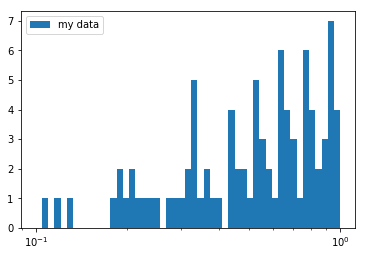

In [40]:
# same data as above, just taking the histogram of the x axis
plt.hist(xs, label="my data", bins = np.logspace(-1, 0))

plt.xscale("log")

plt.legend() # this'll automatically create a legend using the `label`s used when creating the plot

multiple plots can be combined:


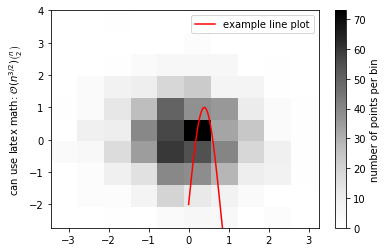

In [43]:
# hist2d creates a "heat map"
plt.hist2d(np.random.normal(size=1000), # x variable
           np.random.normal(size=1000), # y variable
           cmap = "Greys", # sets the colormap
          )

plt.colorbar(label="number of points per bin") # so you can interpret the colors of your colormap

x_line = np.linspace(0, 1, num=50) # 50 equally spaced points between 0 and 1
y_line = 3*np.sin(x_line*4) - 2
plt.plot(x_line, y_line,
         color="red",
         label="example line plot",
        )

# this only works if you already have latex installed
plt.ylabel(r"can use latex math: $\mathcal{O}(n^{3/2}) \binom{n}{2}$")

plt.legend(loc="upper right") # `loc` sets the location of the legend to the given area


# `astropy`
`astropy` is the biggest astronomy package in python. It tends to be pretty general purpose, since it's aimed at all astronomers. If you need something more specific (like a package to reduce data from a specific telescope), that will usually be in a separate package. (Here are some [affiliated packages](http://www.astropy.org/affiliated/index.html) which is a good place to start looking if `astropy` doesn't have what you need.)

It has more than I can talk about here, but I'll go over some popular parts, and you can look at the [tutorials](http://www.astropy.org/astropy-tutorials/) as you need.

## `astropy.units`

In [44]:
from astropy import units as u
from astropy import constants as const

In [45]:
# Physical constants:
const.M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.9884754153381438e+30 uncertainty=9.236140093538353e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2014'>

In [46]:
# Unit conversion
const.M_sun.to(u.g)

<Quantity 1.98847542e+33 g>

In [47]:
# you can still get a plain float if you need
const.M_sun.to(u.g).value

1.9884754153381438e+33

## `astropy` and `fits` files
Astropy is a great way to read and manipulate `.fits` files (see `astropy.io.fits`). They even have a whole tutorial on this for images, so we're just going to pop over there for a moment:

http://www.astropy.org/astropy-tutorials/rst-tutorials/FITS-images.html

# `scipy` for more complex numerical tools than `numpy`

In [48]:
import scipy

**Note**: `scipy` doesn't import all of itself automatically; it would take too long / be too large. Instead you'll have to explicitly import submodules, like we do below. There's two main options for the syntax:

1) `import scipy.optimize`, which you then use by calling, e.g., `scipy.optimize.root()`

2) `from scipy import optimize`, which you can call by simply using `optimize.root()` (you don't need to say `scipy.` first)

## Example: function "root" solver

In [49]:
import scipy.optimize

In [50]:
def f(x):
    return x + np.exp(x) - 4

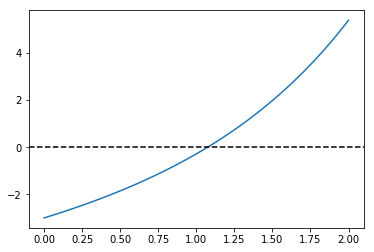

In [51]:
xs = np.linspace(0, 2)
plt.plot(xs, f(xs))
plt.axhline(0, linestyle="dashed", color="black")

In [52]:
scipy.optimize.root(f, 0)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.66453526e-13])
       r: array([-3.92627094])
  status: 1
 success: True
       x: array([1.07372894])

## Example: integrator

In [53]:
import scipy.integrate

In [54]:
def deriv(t, y):
    # this is dy/dt evaluated at t where y=y(t)
    return y

In [55]:
ts = np.linspace(0, 5, num=100)
results = scipy.integrate.solve_ivp(deriv,
                                    [min(ts), max(ts)],
                                    [1], #start at t0=min(ts), and y(t0)=1
                                    t_eval = ts,
                                   )

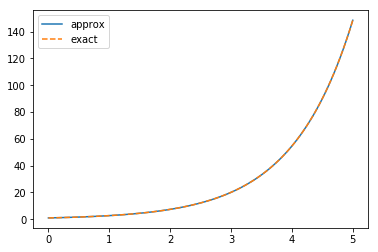

In [56]:
plt.plot(results.t, 
         results.y.flatten(),
         label="approx",
        )

plt.plot(results.t,
         np.exp(results.t),
         label="exact",
         linestyle="dashed",
        )


plt.legend(loc="best")
# plt.xlim(-5, 5)
# plt.ylim(-10, 10)

Scipy also contains a bunch of useful things like:
- special functions (`airy`, Bessel)
- Fourier transforms
- statistics

# `pandas` and `DataFrames`

`pandas` is great for reading in, and exploring a number of different types of datasets. It's still based on `numpy.array`s, but adds a lot more usability

They also have a nice set of getting started guides:
 - [10 Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
 - [Comparison with R / R libraries](https://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html)
 - [Comparison to SQL](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html)

In [57]:
import pandas as pd

In [58]:
df_planets = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv')
print(type(df_planets))

df_planets.head(10) # shows the top 10 rows of the dataframe

<class 'pandas.core.frame.DataFrame'>


method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
5  Radial Velocity       1         185.840   4.80     76.39  2008
6  Radial Velocity       1        1773.400   4.64     18.15  2002
7  Radial Velocity       1         798.500    NaN     21.41  1996
8  Radial Velocity       1         993.300  10.30     73.10  2008
9  Radial Velocity       2         452.800   1.99     74.79  2010

In [59]:
df_planets.describe()

number  orbital_period        mass     distance         year
count  1035.000000      992.000000  513.000000   808.000000  1035.000000
mean      1.785507     2002.917596    2.638161   264.069282  2009.070531
std       1.240976    26014.728304    3.818617   733.116493     3.972567
min       1.000000        0.090706    0.003600     1.350000  1989.000000
25%       1.000000        5.442540    0.229000    32.560000  2007.000000
50%       1.000000       39.979500    1.260000    55.250000  2010.000000
75%       2.000000      526.005000    3.040000   178.500000  2012.000000
max       7.000000   730000.000000   25.000000  8500.000000  2014.000000

In [60]:
df_mean_values = df_planets.groupby("method") \
                           .mean()
df_mean_values

number  orbital_period      mass  \
method                                                              
Astrometry                     1.000000      631.180000       NaN   
Eclipse Timing Variations      1.666667     4751.644444  5.125000   
Imaging                        1.315789   118247.737500       NaN   
Microlensing                   1.173913     3153.571429       NaN   
Orbital Brightness Modulation  1.666667        0.709307       NaN   
Pulsar Timing                  2.200000     7343.021201       NaN   
Pulsation Timing Variations    1.000000     1170.000000       NaN   
Radial Velocity                1.721519      823.354680  2.630699   
Transit                        1.954660       21.102073  1.470000   
Transit Timing Variations      2.250000       79.783500       NaN   

                                  distance         year  
method                                                   
Astrometry                       17.875000  2011.500000  
Eclipse Timing Variations       315.360000  2010.000000  
Imaging                          67.715937  2009.131579  
Microlensing                   4144.000000  2009.782609  
Orbital Brightness Modulation  1180.000000  2011.666667  
Pulsar Timing                  1200.000000  1998.400000  
Pulsation Timing Variations            NaN  2007.000000  
Radial Velocity                  51.600208  2007.518987  
Transit                         599.298080  2011.236776  
Transit Timing Variations      1104.333333  2012.500000

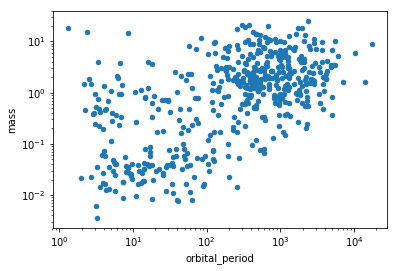

In [61]:
# pandas also provides some simple wrappers to speed up some plotting:
df_planets.plot(x="orbital_period", y="mass", 
                kind="scatter", 
                loglog=True)


**More functionality**

I won't show all the examples here, but other easy things I commonly use are:
*   `df_1.join(df_2, how="outer", ...)` 
*   `df_planets.drop_duplicates()`
*  `pd.read_sql_table`
* `pd.concat([df_1, df_2])`  - concatenate rows
* `df.apply` (applies a function to each row or column)
*  `df.pivot(...)` / `df.melt(...
)`

# `scikit-learn` for basic modelling

Great. So we have a data in an easy-to-use structure (using `pandas`) and we use `matplotlib` to help with plotting during exploratory data analsysi.

Now we want to start building basic models on the data. A good starting place is `scikit-learn` (or `sklearn`).  It includes some really easy interfaces to some pretty powerful models.

In [62]:
import sklearn
import sklearn.model_selection

# filter to only allow planets with mass and orbital period
df_planets_filtered = df_planets[["mass", "orbital_period"]]
df_planets_filtered = df_planets_filtered.dropna(axis=0) # this is a built-in pandas.DataFrame function

# split 75/25 training/testing
df_planets_training, df_planets_testing = sklearn.model_selection.train_test_split(df_planets_filtered)

## Linear Model: mass = A * orbital_period + c

All scikit learn models follow a simple structure (below) which makes it easy to swap/test out new models:
```
model = sklearn. ... .ModelName(...)
model.fit(x, y)
y_new = model.predict(x_new)
```

In [63]:
import sklearn.linear_model

model = sklearn.linear_model.LinearRegression(fit_intercept=True, 
                                              normalize=False)

x_train = df_planets_training["orbital_period"].values.reshape(-1, 1)
y_train = df_planets_training["mass"].values.reshape(-1, 1)

model.fit(x_train, y_train)

x_test = df_planets_testing["orbital_period"].values.reshape(-1, 1)
y_test = df_planets_testing["mass"].values.reshape(-1, 1)

y_predict = model.predict(x_test)

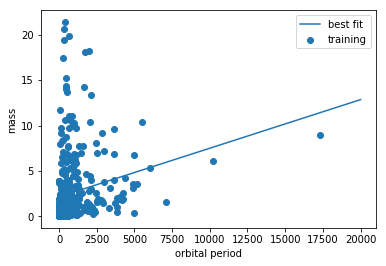

In [64]:
xs = np.linspace(0, 2*10**4).reshape(-1, 1)
ys = model.predict(xs)

plt.plot(xs, ys, label="best fit")
plt.scatter(x_train, y_train, label="training")
# plt.scatter(x_test, y_test, label="testing")

plt.xlabel("orbital period")
plt.ylabel("mass")

plt.legend()


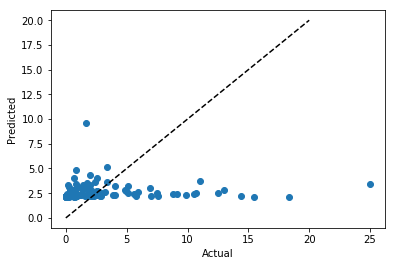

In [65]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.plot([0, 20], [0, 20],
         linestyle="dashed", color="black")

Okay, so yes, it's a terrible model. This dataset doesn't include any great linear models. But you get the point that actually training and using a linear model is super easy with `scikit-learn`.